In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

bottle = "/Users/zanderbonnet/Desktop/Math 167PS/Project/bottle.csv"
#bottle = "/Users/adamaslam/Desktop/MATH167PS/bottle.csv"
#bottle = "/Users/Nick/Downloads/bottle.csv/bottle.csv"

data = pd.read_csv(bottle)

/Users/zanderbonnet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#ChlorA as response variable 
dataSubset=data[["ChlorA","O2Sat","Salnty","Phaeop","PO4uM","SiO3uM","NO2uM","NO3uM","NH3uM"]]
yX = dataSubset.dropna() #Remove all missing values


from scipy import stats
z = np.abs(stats.zscore(yX)) #Calucluates zscore of all points
yX = yX[(z < 3).all(axis=1)] #Removes all values more than 3 sd's away

X = yX.drop('ChlorA',axis=1) #Creates a matrix without chlorA
y=yX["ChlorA"] #Responce matrix


np.random.seed(10)
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.2)

In this section, we create our testing and training data. First, we subset the data into the variables we are interested in. We then remove points with NA values and outlier with a z-score over three. Then we seperate our data by testing and training data, and independent and dependent variables.

In [3]:
#below is all variables in the model. we get a r^2 at 0.69.Not great so in the next block I do backward seleciton to improve
LR=LinearRegression()
LR.fit(train_x,train_y)
prediction_y =  LR.predict(test_x)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
r2=r2_score(test_y,prediction_y)
print('The predicted r^2  is ',round(r2,2))
print('mean_sqrd_error is',mean_squared_error(test_y,prediction_y))
print('root_mean_squared error of is',np.sqrt(mean_squared_error(test_y,prediction_y)))
print("Standard deviation of chlorA is", np.std(y))

The predicted r^2  is  0.69
mean_sqrd_error is 0.0917904724359263
root_mean_squared error of is 0.3029694249192917
Standard deviation of chlorA is 0.5262826264935552


In this section, we create our full linear regression model, and find the predicted r^2 and mean squared error for the model. From this information, the linear model seems to be adequate so far. 

                            OLS Regression Results                            
Dep. Variable:                 ChlorA   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.028e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        19:56:37   Log-Likelihood:                -5463.9
No. Observations:               34412   AIC:                         1.095e+04
Df Residuals:                   34403   BIC:                         1.102e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
O2Sat          0.0245      0.000     65.974      0.0

/Users/zanderbonnet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


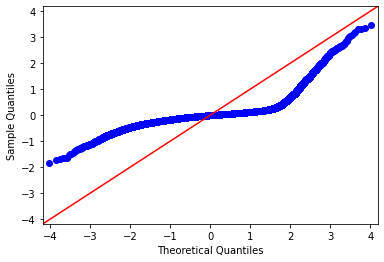

The predicted r^2  is  0.69


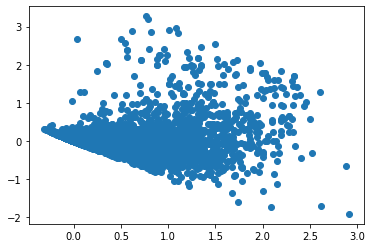

In [4]:
import statsmodels.api as sm 
X['intercept'] = 1 #Must have a constant column for stats models to work
np.random.seed(10)
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.2)

olsmod = sm.OLS(train_y, train_x)
olsres = olsmod.fit()
print(olsres.summary())
#From this we can see the coeffetients of all of the predictors and if there were a p value over .5
#we could remove it from the model. All of our predictors are statistacly significant in this case.
res = olsres.resid
fig = sm.qqplot(res, line = '45')
plt.show()
ypred = olsres.predict(test_x)
r2=r2_score(test_y,ypred)
print('The predicted r^2  is ',round(r2,2))

fig, ax = plt.subplots()
ax.plot(ypred, test_y-ypred, 'o'); #residuals vs fitted values plot

Here, we create the summary description of the linear model and a residuals vs fitted plot. Since there is multicollinearity present as indicated above, some features are redundant. We can do pairwise plots to investigate further.

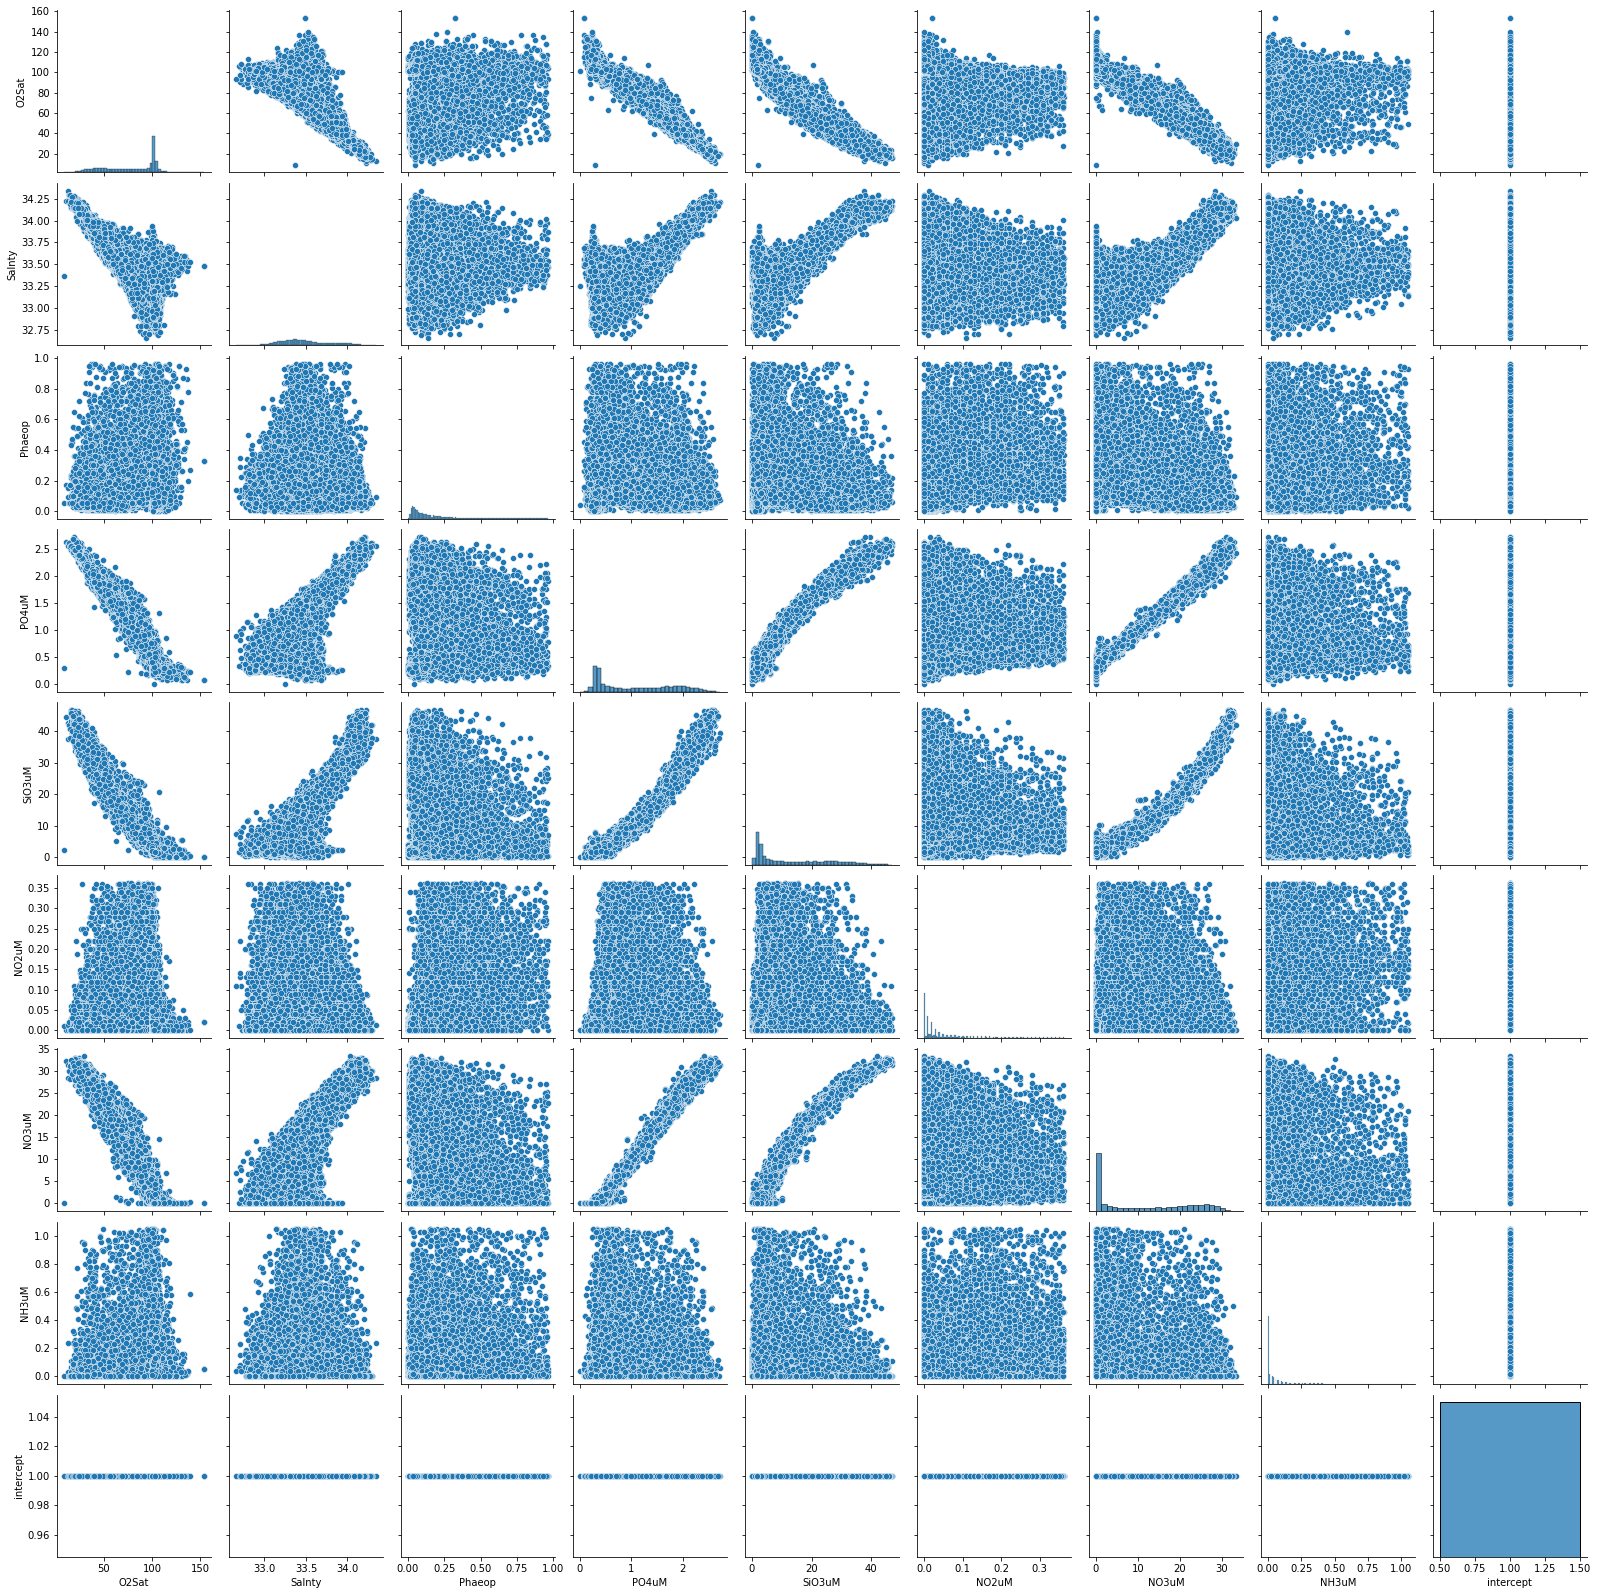

In [5]:
sns.pairplot(train_x);

The above shows a lot of multicollinearity. The only variables that dont seem to be too correlated with others are phaeop and NO2uM. In order to fix the multicollinearity problem, we will perform principal component analysis.

The first four principal components explain 0.9667 of the variance in the data
                            OLS Regression Results                            
Dep. Variable:                 ChlorA   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 1.697e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        19:59:07   Log-Likelihood:                -7719.5
No. Observations:               34412   AIC:                         1.545e+04
Df Residuals:                   34407   BIC:                         1.549e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

/Users/zanderbonnet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


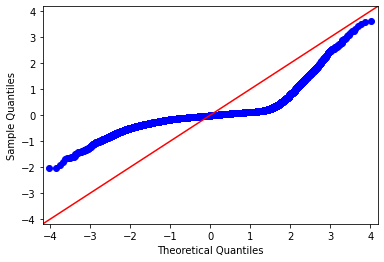

The predicted r^2  is  0.65
mean_sqrd_error is 0.10369037912471063
root_mean_squared error of is 0.3220099053208001
Standard deviation of chlorA is 0.5262826264935552


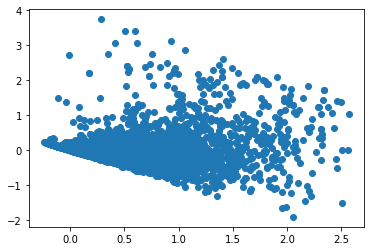

In [11]:
#ChlorA as response variable 
#Build the model using PCA components
dataSubset=data[["ChlorA","O2Sat","Salnty","Phaeop","PO4uM","SiO3uM","NO2uM","NO3uM","NH3uM"]]
yX = dataSubset.dropna() #Remove all missing values

from scipy import stats
z = np.abs(stats.zscore(yX)) #Calculate zscores
yX = yX[(z < 3).all(axis=1)] #Removes all columns with a zscore over 3 in it

X = yX.drop('ChlorA',axis=1) #Creates a matrix without chlorA
y=yX["ChlorA"] #Responce matrix

pca = PCA(n_components=8)
xScaled = StandardScaler().fit_transform(X)
PC = pca.fit_transform(xScaled)
print('The first four principal components explain', round(pca.explained_variance_ratio_[0:4].sum(),4), 'of the variance in the data')
# The first four principal components explain about 96% of the variance, so these will be used to prevent multicollinearity. 
Xpca = PC[:,0:4]
Xpca = pd.DataFrame(Xpca)
Xpca['intercept'] = 1 #Must have a constant column for statsmodels to work on intercept
y = y.reset_index(drop=True) #Force indexs to match
np.random.seed(10)
train_x, test_x, train_y, test_y = train_test_split(Xpca, y,test_size=0.2)


# Below is all variables in the model. We get a r^2 at 0.66
import statsmodels.api as sm 
olsmod2 = sm.OLS(train_y, train_x)
olsres2 = olsmod2.fit()
print(olsres2.summary())
#From this we can see the coeffetients of all of the predictors and if there were a p value over .5
#we could remove it from the model. All of our predictors are statistacly significant in this case.
res2 = olsres2.resid
fig = sm.qqplot(res2, line = '45')
plt.show()
ypred2 = olsres2.predict(test_x)

# predicting the accuracy score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(test_y,ypred2)


fig, ax = plt.subplots()
ax.plot(ypred2, test_y-ypred2, 'o');


print('The predicted r^2  is ',round(r2,2))
print('mean_sqrd_error is',mean_squared_error(test_y,ypred2))
print('root_mean_squared error of is',np.sqrt(mean_squared_error(test_y,ypred2)))
print("Standard deviation of chlorA is", np.std(y))


We perform principal component analysis, and reduce the data to four principal components, explaining about 96.67% of the variance. We get a prediction r^2 of 0.65, which is okay. 

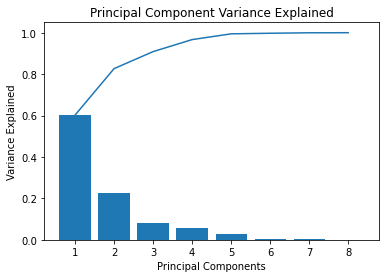

In [7]:
# Create PCA plot
plt.bar(range(1,9), pca.explained_variance_ratio_)
cumSum = [pca.explained_variance_ratio_[0]]
for i in range(1,8):
    cumSum += [pca.explained_variance_ratio_[i] + cumSum[i-1]]
plt.plot(range(1,9),cumSum)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Principal Component Variance Explained');

This graph shows the cumulative and inidvidual variance explained for each principal component.

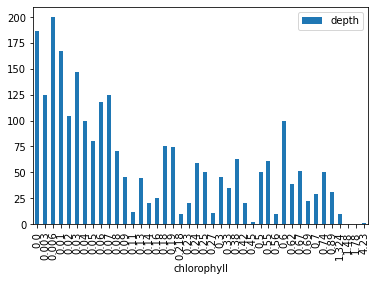

In [8]:
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#data = pd.read_csv('C:/Users/blesh/Downloads/archive/bottle.csv')

#make a dataframe of the chlorophyll and depth
chl_dep = pd.DataFrame({'chlorophyll': data['ChlorA'][::4000], 'depth': data['Depthm'][::4000]})
#drop the nan values 
chl_dep.dropna()

#group around chlorophyll and take the means and plot in a bar plot
chl_dep.groupby('chlorophyll').mean().plot.bar();

The above bar plot shows the average chlorophyll levels by depths. A subset of the entire dataset was taking to reduce compile time and get a wider range of values throughout the data set. It demonstrates that the amount of chlorophyll does depend on depth with higher depths having less chlorophyll and visa versa. 